In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

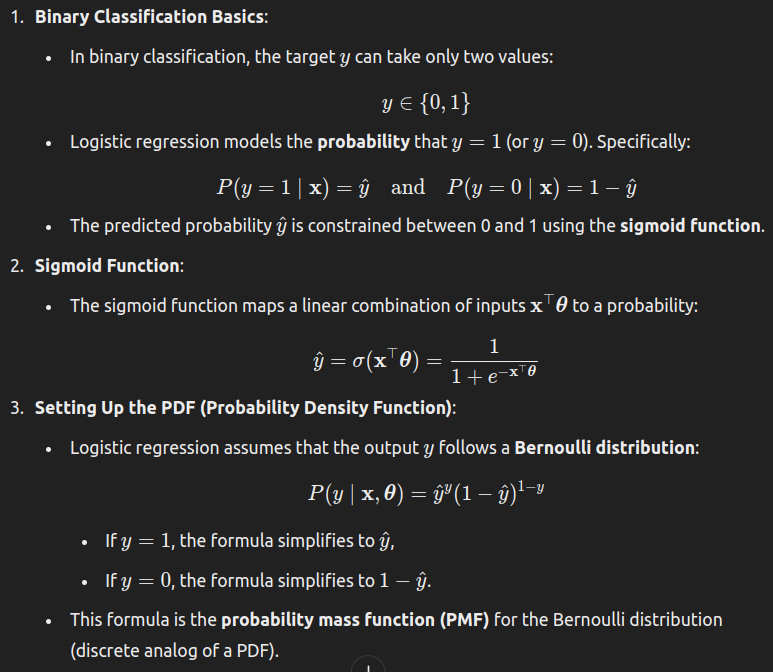

In [ ]:
#setting up the likelihood function -> maximising it... which is same as minimising the cost function J(theta)

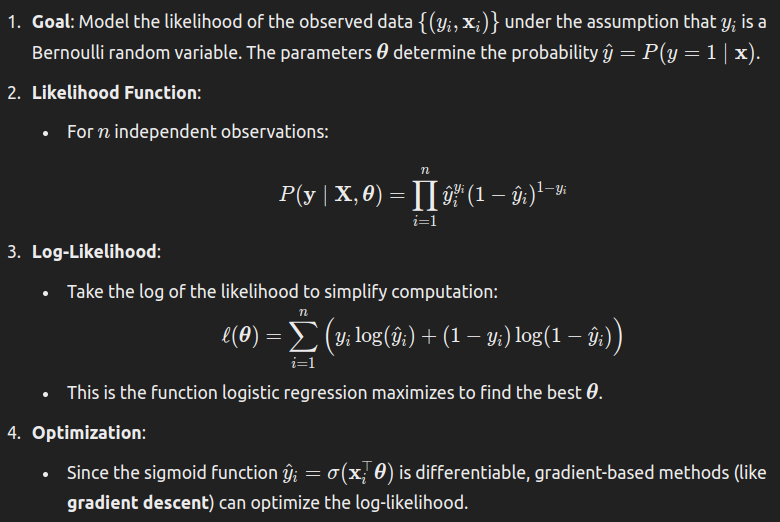

In [ ]:
# how do we check for values in logistic regression.

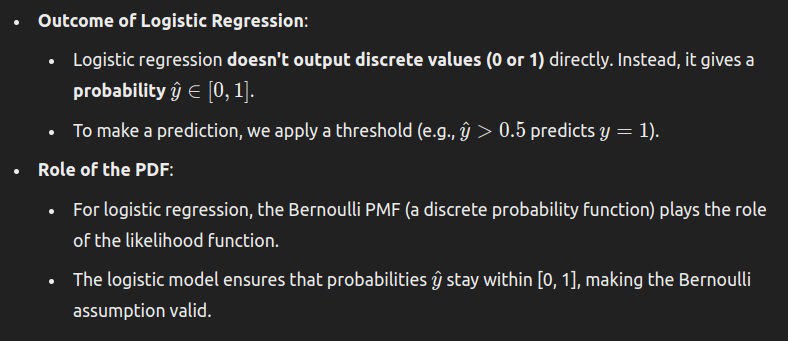

#### **A small clarification note**

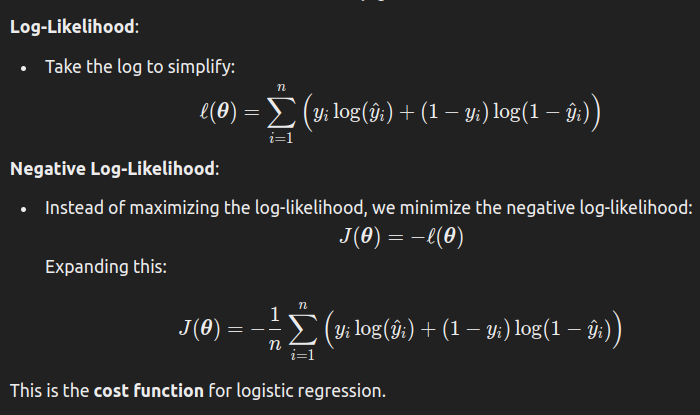

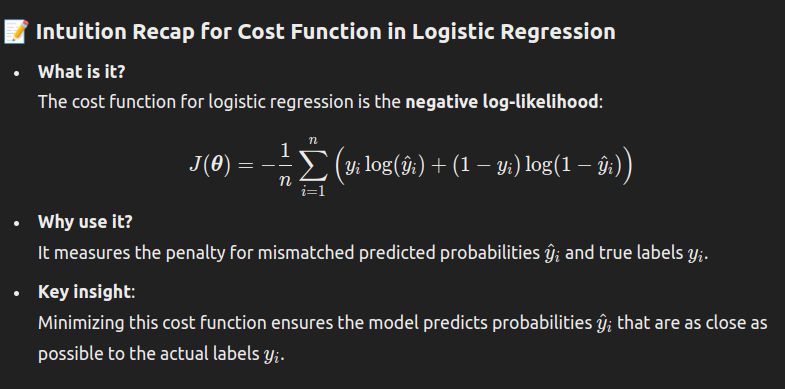

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
from sklearn import datasets

iris_data = datasets.load_iris()

In [89]:
list(iris_data.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [90]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [91]:
y = (iris_data['target'] == 2).astype(int) # 1 if the flower is iris_virginica else 0

In [92]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [93]:
X = iris_data['data'][:, 3:] # this slicing means that we keep all the rows and slice based on the columns only starting from index 3 till everything... which is classifying based on petal width only.

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [95]:
model.fit(X, y)

LogisticRegression()

In [96]:
model.coef_

array([[4.3330846]])

In [97]:
# creating the test set (for flowers with petal widths varying from 0 to 3 cm)
X_test = np.linspace(0, 3, 1000).reshape(-1, 1)
y_pred = model.predict_proba(X_test)

In [98]:
y_pred

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

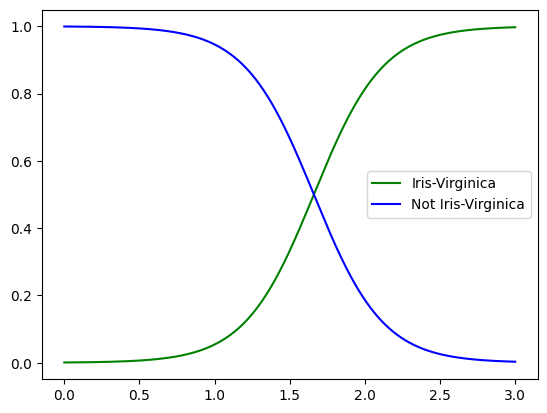

In [99]:
plt.plot(X_test, y_pred[:, 1], 'g-', label="Iris-Virginica")
plt.plot(X_test, y_pred[:, 0], 'b-', label='Not Iris-Virginica')
plt.legend()

In [145]:
import math
t = [1, 3, 5]
t_new = [math.exp(num) for num in t]
t_new

[2.718281828459045, 20.085536923187668, 148.4131591025766]

In [146]:
def sigmoid_fn(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x)) # numpy makes it vectorized

In [147]:
np.ones(19)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [167]:
def logistic_regression(num_iterations, X_train, y_train, learning_rate=0.1):

    m = X_train.shape[0] # number of data points
    n = X_train.shape[1] # the number of features (or the number of columns in X_train)
    
    # start off with some random weights and bias
    w = np.random.rand(n) 
    ones = np.ones(m)
    b = 0
    for _ in range(num_iterations):

        # calculate the partial derivative (gradient)
        z = np.dot(X_train, w) + b
        y_hat = sigmoid_fn(z)
        gradient_vector = (1/m) * np.dot(X_train.T, (y_hat - y_train))
        gradient_b = (1/m) * np.sum(y_hat - y_train)

        # update the weights
        w = w - learning_rate*gradient_vector
        b = b - learning_rate*gradient_b
        
    return w, b

In [180]:
final_w, final_b = my_log_reg = logistic_regression(1000, X, y)

final_w, final_b

(array([3.03404619]), -4.91014499315984)

In [181]:
def calculate_probabilities(X_test, w, b):
    z = np.dot(X_test, w) + b
    y_hat = sigmoid_fn(z) # predicted probability value
    
    return y_hat

In [182]:
my_y_pred = calculate_probabilities(X_test, final_w, final_b)

In [183]:
y_pred[:, 1].shape
print(X_test.shape)
print(y_pred[:, 0].shape)

(1000, 1)
(1000,)


In [184]:
my_y_pred.shape

(1000,)

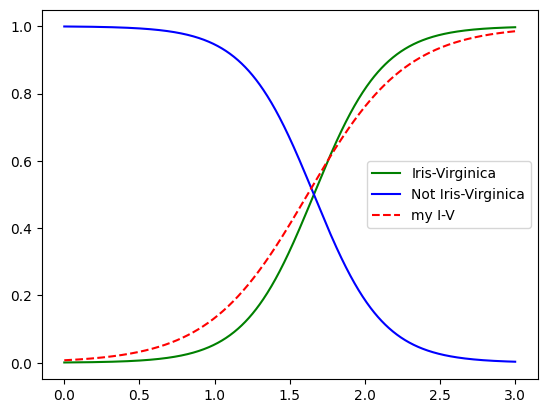

In [185]:
plt.plot(X_test, y_pred[:, 1], 'g-', label="Iris-Virginica")
plt.plot(X_test, y_pred[:, 0], 'b-', label='Not Iris-Virginica')
plt.plot(X_test, my_y_pred, 'r--', label="my I-V")

plt.legend()

# Comparing accuracy of the model

In [114]:
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Compare predictions (using accuracy)
# custom_accuracy = accuracy_score(y_test, custom_predictions)
# sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

# print("Custom Logistic Regression Accuracy:", custom_accuracy)
# print("Scikit-learn Logistic Regression Accuracy:", sklearn_accuracy)

# # Compare confusion matrices
# custom_cm = confusion_matrix(y_test, custom_predictions)
# sklearn_cm = confusion_matrix(y_test, sklearn_predictions)

# print("Custom Logistic Regression Confusion Matrix:\n", custom_cm)
# print("Scikit-learn Logistic Regression Confusion Matrix:\n", sklearn_cm)